Script for creating visualisation

In [96]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import mapclassify
import numpy as np

In [2]:
# load geometry data
vic_geo_df = gpd.read_file('../data/VIC_LOCALITY_POLYGON_shp.geojson')

In [3]:
vic_geo_df.head()

,LG_PLY_PID,DT_CREATE,DT_RETIRE,LGA_PID,VIC_LGA_sh,VIC_LGA__1,VIC_LGA__2,VIC_LGA__3,VIC_LGA__4,VIC_LGA__5,geometry
0,452,2017-09-08,None,VIC245,2017-09-08,None,FALLS CREEK ALPINE RESORT (UNINCORPORATED),FALLS CREEK ALPINE RESORT (UNINC),None,2,"POLYGON ((147.24172 -36.86703, 147.24202 -36.8..."
1,465,2017-09-08,None,VIC246,2017-09-08,None,MOUNT BULLER ALPINE RESORT (UNINCORPORATED),MOUNT BULLER ALPINE RESORT (UNINC),None,2,"POLYGON ((146.46042 -37.12999, 146.46062 -37.1..."
2,475,2017-09-08,None,VIC231,2017-09-08,None,CORANGAMITE SHIRE,CORANGAMITE,None,2,"POLYGON ((143.47180 -38.28086, 143.47117 -38.2..."
3,480,2017-09-08,None,VIC226,2017-09-08,None,KINGSTON CITY,KINGSTON,None,2,"POLYGON ((145.10925 -38.04438, 145.10912 -38.0..."
4,481,2017-09-08,None,VIC227,2017-09-08,None,FRANKSTON CITY,FRANKSTON,None,2,"POLYGON ((145.10531 -38.15533, 145.10556 -38.1..."


In [4]:
# load active cases data
df_all_dates = pd.read_csv('../data/all_dates.csv')

In [5]:
df_all_dates.head()

,lga,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,...,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04
0,ALPINE,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0,0,0
1,ARARAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,1,1.0,1,1,1
2,BALLARAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11,10,10,10,10,10,11.0,11,11,12
3,BANYULE,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,153,151,144,144,144,141,146.0,143,136,133
4,BASS COAST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,2,2,3,4,5.0,4,4,3


In [6]:
vic_geo_df = pd.merge(vic_geo_df[['VIC_LGA__3', 'geometry']], df_all_dates[['lga', '2020-08-01']], how = 'inner', left_on = 'VIC_LGA__3', right_on = 'lga', sort = True)

In [50]:
vic_geo_df.head()

,VIC_LGA__3,geometry,lga,2020-08-01
0,ALPINE,"POLYGON ((147.33765 -37.02971, 147.33788 -37.0...",ALPINE,0.0
1,ARARAT,"POLYGON ((142.41911 -37.47345, 142.41891 -37.4...",ARARAT,1.0
2,BALLARAT,"POLYGON ((143.84322 -37.67028, 143.84303 -37.6...",BALLARAT,11.0
3,BANYULE,"POLYGON ((145.13566 -37.74089, 145.13561 -37.7...",BANYULE,146.0
4,BASS COAST,"POLYGON ((145.50141 -38.57222, 145.49637 -38.5...",BASS COAST,5.0


<AxesSubplot:>

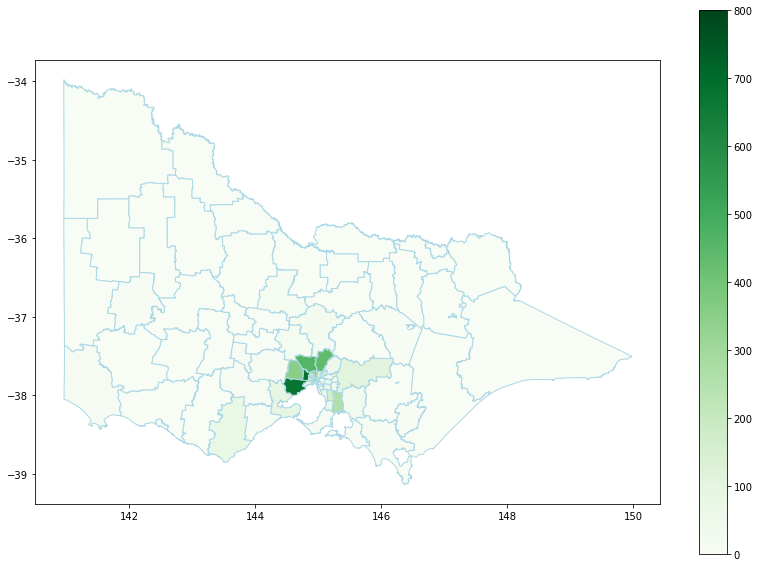

In [132]:
vic_geo_df.plot(figsize = (14,10), column = '2020-08-01', legend = True, 
                      cmap = 'Greens', k = 20, vmin = 0, vmax = 800, edgecolor = 'lightblue')

now just map the melbourne lgas

In [39]:
melb_lgas = ['Banyule','Bayside','Boroondara','Brimbank','Cardinia','Casey','Darebin','Frankston','Glen Eira',
'Greater Dandenong','Hobsons Bay','Hume','Kingston','Knox','Manningham','Maribyrnong','Maroondah','Melbourne',
'Melton','Monash','Moonee Valley','Moreland','Mornington Peninsula','Nillumbik','Port Phillip','Stonnington',
'Whitehorse','Whittlesea','Wyndham','Yarra','Yarra Ranges']

In [45]:
melb_lgas = [lga.upper() for lga in melb_lgas]

In [48]:
melb_geo_df = vic_geo_df[vic_geo_df['lga'].isin(melb_lgas)]

In [124]:
melb_geo_df.head()

,VIC_LGA__3,geometry,lga,2020-08-01
3,BANYULE,"POLYGON ((145.13566 -37.74089, 145.13561 -37.7...",BANYULE,146.0
8,BAYSIDE,"POLYGON ((144.99705 -37.88387, 145.00104 -37.8...",BAYSIDE,44.0
10,BOROONDARA,"POLYGON ((145.00440 -37.80533, 145.00457 -37.8...",BOROONDARA,60.0
11,BRIMBANK,"POLYGON ((144.86944 -37.72219, 144.86383 -37.7...",BRIMBANK,684.0
14,CARDINIA,"POLYGON ((145.40064 -38.10820, 145.40063 -38.1...",CARDINIA,36.0


In [130]:
q20 = mapclassify.EqualInterval(np.linspace(0, 700, 100), k = 28)
q20

EqualInterval           

    Interval       Count
------------------------
[  0.00,  25.00] |     4
( 25.00,  50.00] |     4
( 50.00,  75.00] |     3
( 75.00, 100.00] |     4
(100.00, 125.00] |     3
(125.00, 150.00] |     4
(150.00, 175.00] |     3
(175.00, 200.00] |     4
(200.00, 225.00] |     3
(225.00, 250.00] |     4
(250.00, 275.00] |     3
(275.00, 300.00] |     4
(300.00, 325.00] |     3
(325.00, 350.00] |     4
(350.00, 375.00] |     4
(375.00, 400.00] |     3
(400.00, 425.00] |     4
(425.00, 450.00] |     3
(450.00, 475.00] |     4
(475.00, 500.00] |     3
(500.00, 525.00] |     4
(525.00, 550.00] |     3
(550.00, 575.00] |     4
(575.00, 600.00] |     3
(600.00, 625.00] |     4
(625.00, 650.00] |     3
(650.00, 675.00] |     4
(675.00, 700.00] |     4

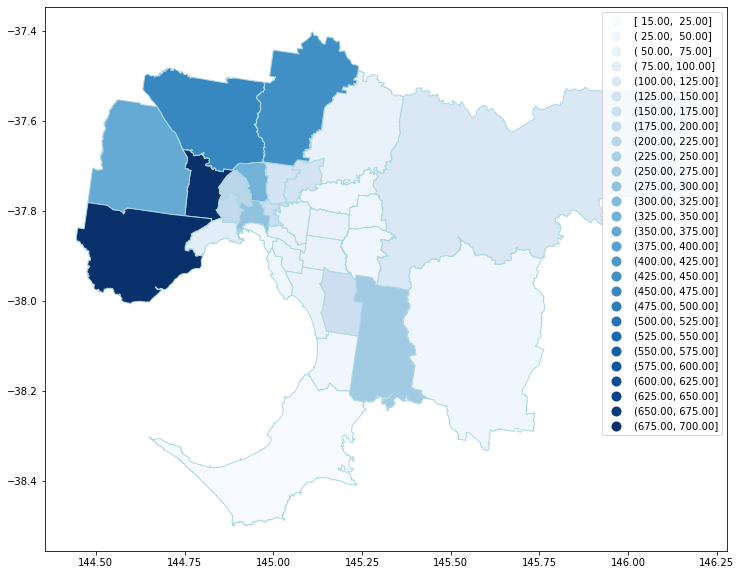

In [134]:
melb_geo_df.plot(figsize = (14,10), column = '2020-08-01', legend = True, 
                      cmap = 'Blues', scheme = 'userdefined', classification_kwds={'bins':q20.bins}, edgecolor = 'lightblue')
plt.savefig('test.png')